In [1]:
# import dependencies
%pip install pyreadr
import pyreadr
%pip install rdata
import rdata
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Read-in csv and assess for preprocessing

In [2]:
harris_co_df = pd.read_csv(r'C:\Users\rasha\Project 2\Project 2\Resources\houston-metro-cleaned.csv')
harris_co_df

,Date,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
0,2000-01-02,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
1,2000-01-02,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2,2000-01-02,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
3,2000-01-02,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
4,2000-01-02,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036
...,...,...,...,...,...,...,...,...,...,...
69016,2020-12-30,65.192,73.058,67.568,65.840,73.796,68.198,63.338,73.904,66.812
69017,2020-12-30,63.230,74.930,67.208,63.842,75.524,67.784,61.916,74.678,66.254
69018,2020-12-30,62.996,72.986,66.236,63.392,73.634,66.830,61.016,73.256,65.552
69019,2020-12-30,59.486,73.796,65.840,59.828,74.300,66.362,58.568,73.418,64.994


### Time-Series Analysis Insights

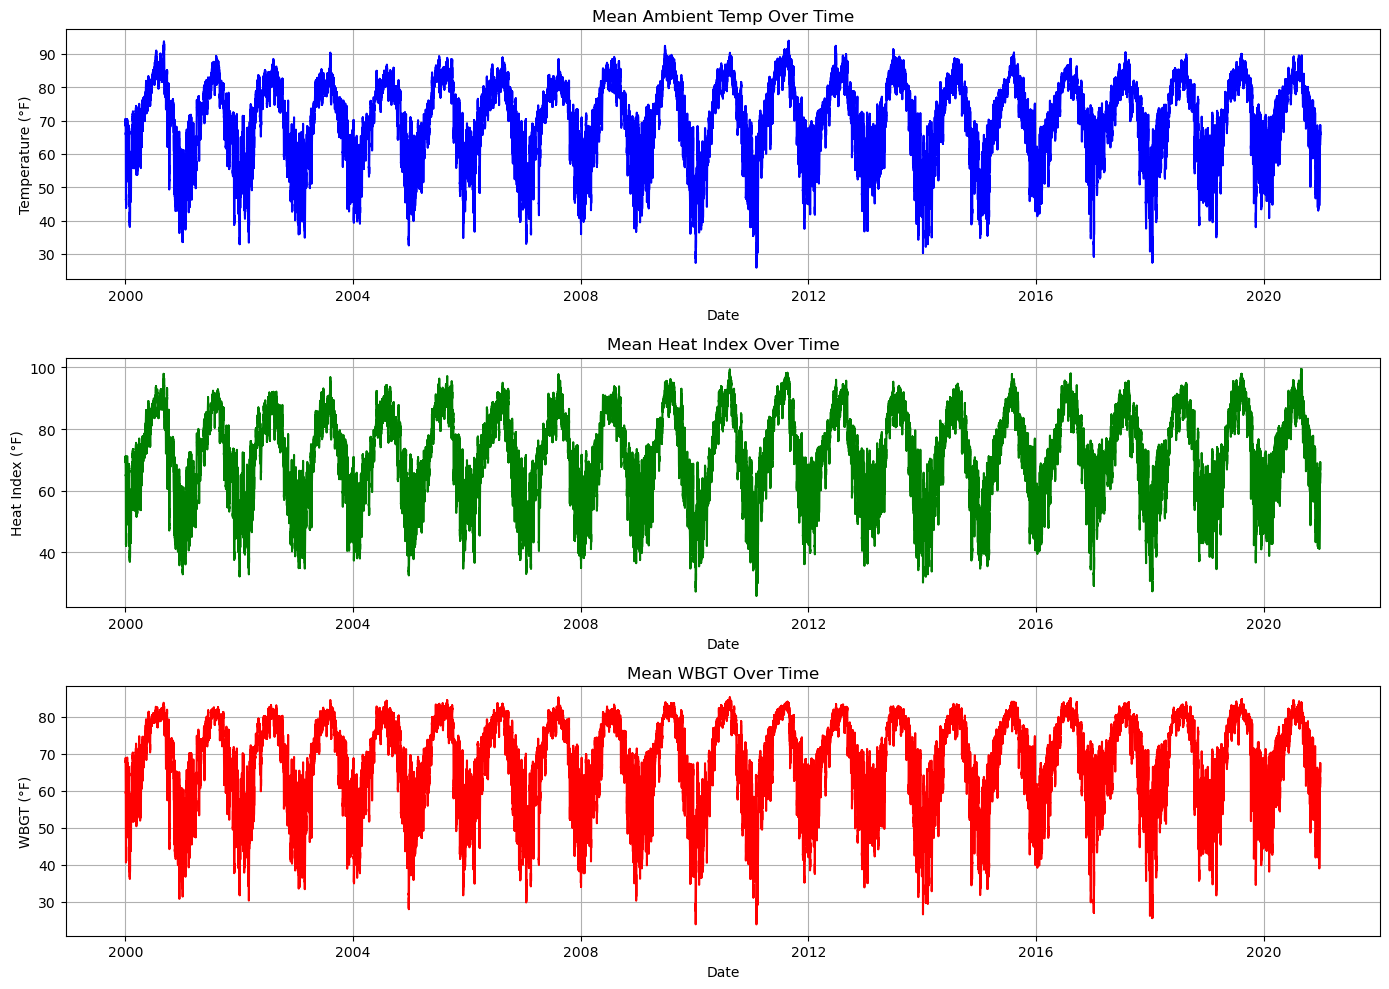

In [3]:
# Convert the 'Date' column to datetime format
harris_co_df['Date'] = pd.to_datetime(harris_co_df['Date'])

# Set the Date column as the index for time series analysis
harris_co_df.set_index('Date', inplace=True)

# Plot the time series for Mean Ambient Temp, Mean Heat Index, and Mean WBGT
plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.plot(harris_co_df.index, harris_co_df['Mean Ambient Temp'], label='Mean Ambient Temp', color='blue')
plt.title('Mean Ambient Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)

plt.subplot(312)
plt.plot(harris_co_df.index, harris_co_df['Mean Heat Index'], label='Mean Heat Index', color='green')
plt.title('Mean Heat Index Over Time')
plt.xlabel('Date')
plt.ylabel('Heat Index (°F)')
plt.grid(True)

plt.subplot(313)
plt.plot(harris_co_df.index, harris_co_df['Mean WBGT'], label='Mean WBGT', color='red')
plt.title('Mean WBGT Over Time')
plt.xlabel('Date')
plt.ylabel('WBGT (°F)')
plt.grid(True)

plt.tight_layout()
plt.show()



### The plots above illustrate the trends over time for the following variables:

Mean Ambient Temp (Top Plot):

The plot shows clear seasonal patterns with temperatures peaking during the summer months and dipping in the winter months. There may be subtle long-term trends, such as gradual increases in summer peaks or winter lows.
Mean Heat Index (Middle Plot):

The heat index follows a similar seasonal pattern to the ambient temperature, but with higher peaks during the summer. This reflects the impact of humidity on perceived heat, making it feel hotter than the actual temperature during the warmer months.
Mean WBGT (Bottom Plot):

The WBGT, which accounts for temperature, humidity, wind speed, and solar radiation, also exhibits strong seasonal patterns. Like the heat index, WBGT values peak during the summer months, indicating higher levels of heat stress.

In [4]:
harris_co_df

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
Date,,,,,,,,,
2000-01-02,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
2000-01-02,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2000-01-02,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
2000-01-02,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
2000-01-02,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036
...,...,...,...,...,...,...,...,...,...
2020-12-30,65.192,73.058,67.568,65.840,73.796,68.198,63.338,73.904,66.812
2020-12-30,63.230,74.930,67.208,63.842,75.524,67.784,61.916,74.678,66.254
2020-12-30,62.996,72.986,66.236,63.392,73.634,66.830,61.016,73.256,65.552


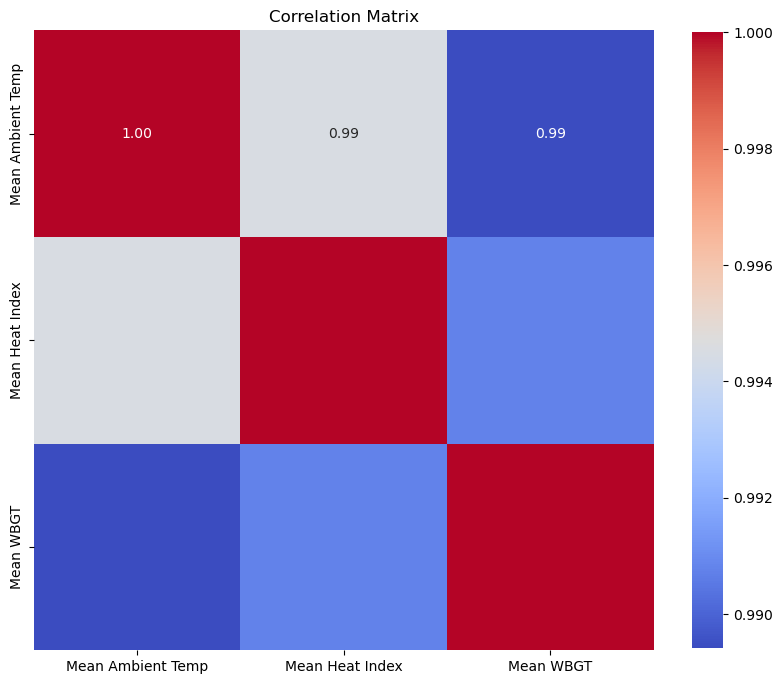

,Mean Ambient Temp,Mean Heat Index,Mean WBGT
Mean Ambient Temp,1.000000,0.994534,0.989415
Mean Heat Index,0.994534,1.000000,0.990764
Mean WBGT,0.989415,0.990764,1.000000


In [43]:
import seaborn as sns

# Calculate the correlation matrix for the key variables
correlation_matrix = harris_co_df[['Mean Ambient Temp', 'Mean Heat Index', 'Mean WBGT']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix values
correlation_matrix


### The heatmap and correlation matrix reveal the following key insights:

High Correlation Between Variables:
Mean Ambient Temp and Mean Heat Index: These two variables are highly correlated (0.99), indicating that as the ambient temperature increases, the perceived heat (as measured by the heat index) also rises. This strong correlation is expected, as the heat index is calculated based on ambient temperature and humidity.
Mean Ambient Temp and Mean WBGT: The correlation between ambient temperature and WBGT is also very high (0.99). WBGT accounts for temperature, humidity, wind speed, and solar radiation, which makes its correlation with ambient temperature significant.
Mean Heat Index and Mean WBGT: The correlation between the heat index and WBGT is similarly strong (0.99), reflecting that both metrics are closely related in capturing heat stress conditions.

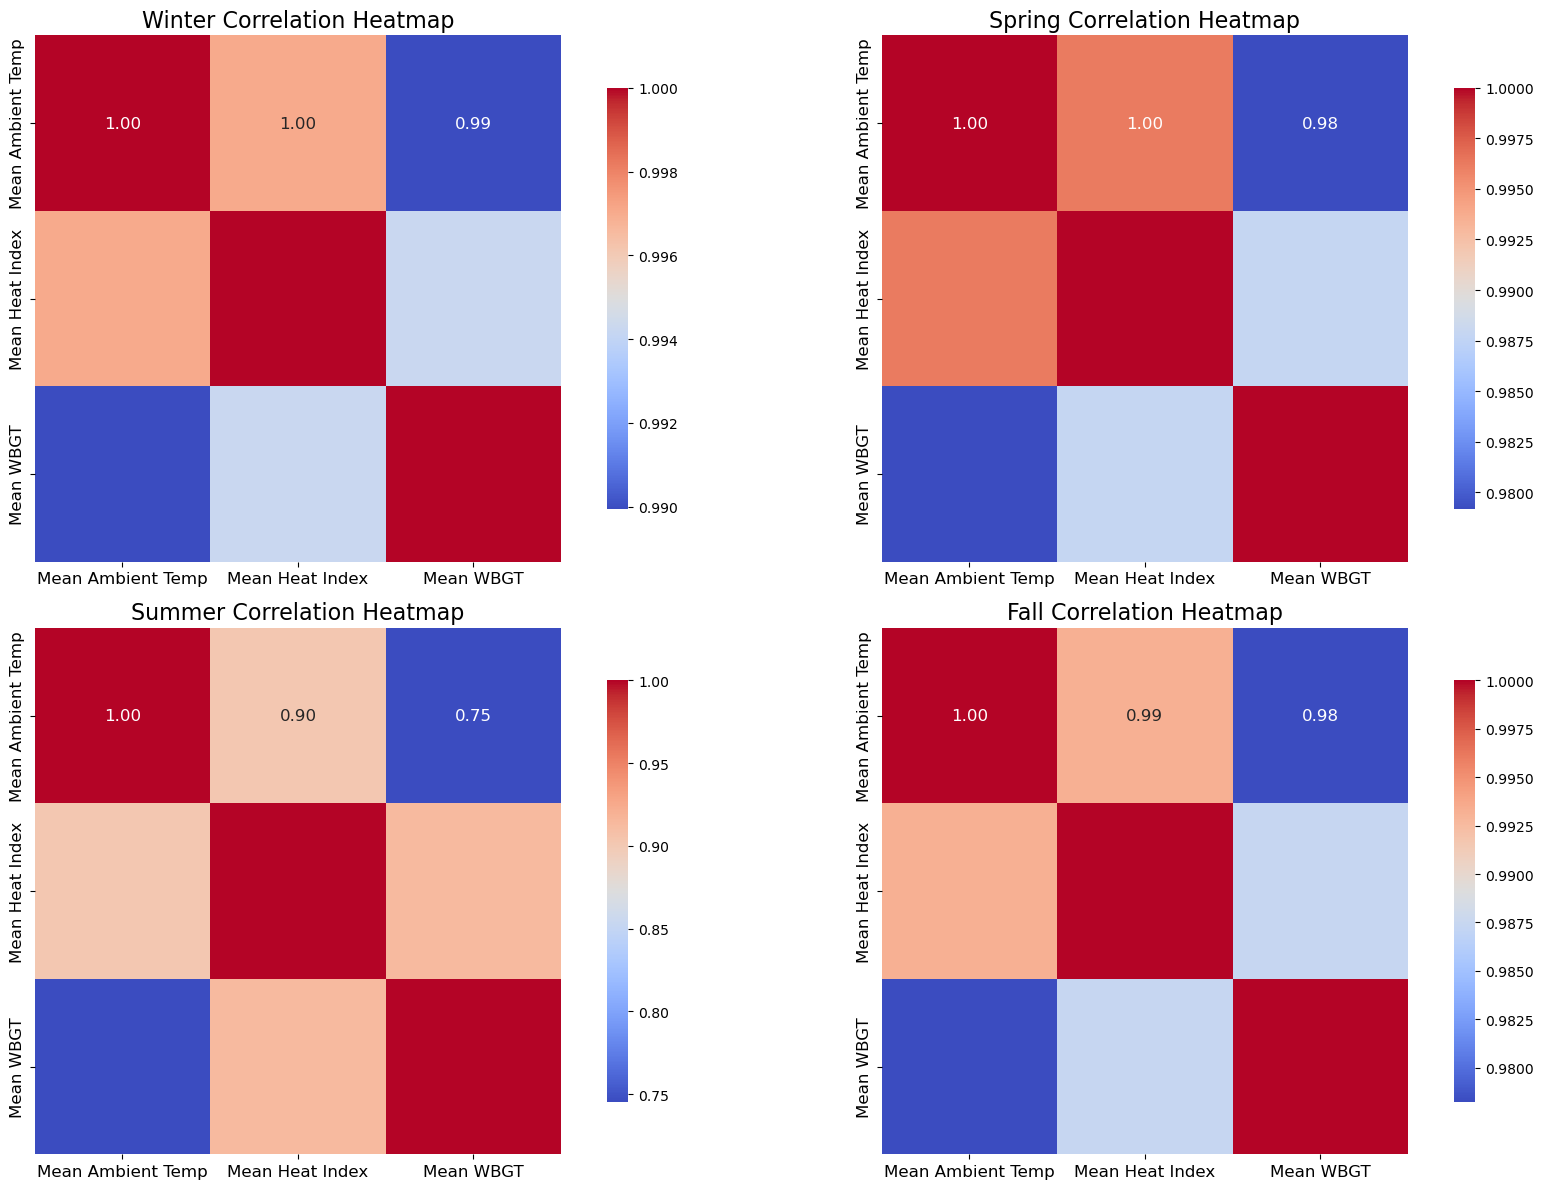

In [46]:
# Function to determine the season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'Season' column
harris_co_df['Season'] = harris_co_df.index.map(get_season)

# Calculate correlations by season
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_correlations = {}

for season in seasons:
    seasonal_data = harris_co_df[harris_co_df['Season'] == season]
    seasonal_correlations[season] = seasonal_data[['Mean Ambient Temp', 'Mean Heat Index', 'Mean WBGT']].corr()

# Plot heatmaps for each season
plt.figure(figsize=(18, 12))

for i, season in enumerate(seasons, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(seasonal_correlations[season], annot=True, fmt=".2f", cmap='coolwarm', square=True, 
                cbar_kws={"shrink": .8}, annot_kws={"size": 12})
    plt.title(f'{season} Correlation Heatmap', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### The heatmap above show the correlations between Mean Ambient Temp, Mean Heat Index, and Mean WBGT for each season: Winter, Spring, Summer, and Fall.

Observations:
Summer:

The correlations are very strong during the summer, especially between Mean Ambient Temp and both Mean Heat Index and Mean WBGT. This is expected as higher temperatures in summer lead to increased heat stress.
Winter:

Correlations are slightly lower in winter compared to summer, particularly between Mean Ambient Temp and Mean Heat Index. This suggests that other factors, like humidity, may play a more significant role in perceived heat during cooler months.
Spring and Fall:

The correlations during spring and fall are intermediate, reflecting the transitional nature of these seasons where temperatures and heat stress are not as extreme as in summer but still more pronounced than in winter.
Key Takeaways:
Seasonal Variation: The relationship between ambient temperature and heat stress metrics is strongest during the summer, highlighting the importance of monitoring these variables closely during hot periods.
Winter Anomalies: The slightly lower correlations in winter suggest that the relationship between temperature and perceived heat is more complex during colder months, possibly due to varying humidity and wind conditions.
If you have specific insights you want to explore further or need additional analysis, feel free to ask! ​​

19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:33:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rasha\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\rasha\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1400x800 with 0 Axes>

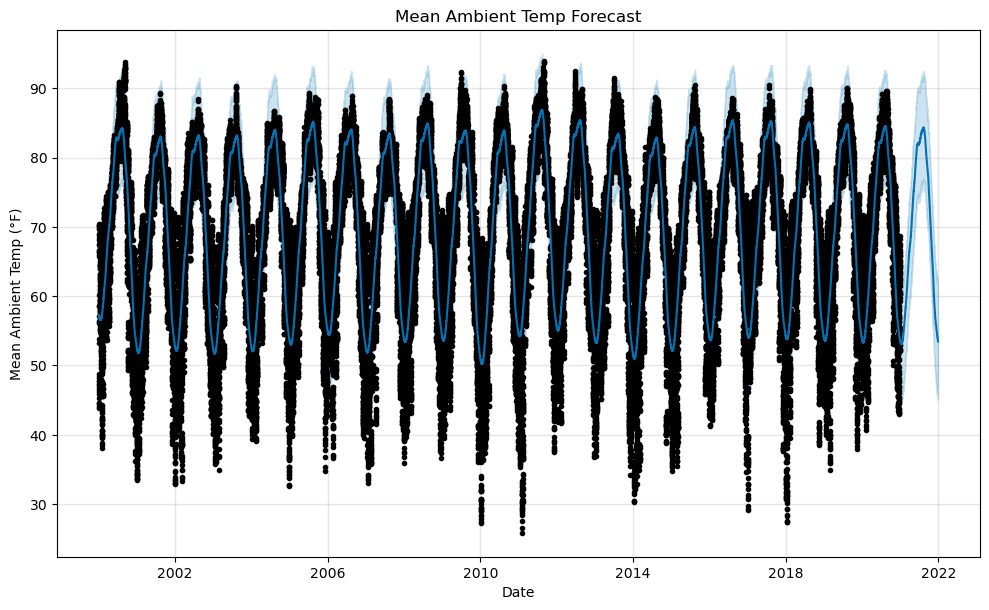

In [51]:
# prophet
from prophet import Prophet

# Prepare the data for Prophet
prophet_df = harris_co_df.reset_index().rename(columns={'Date': 'ds', 'Mean Ambient Temp': 'y'})

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Make a future dataframe for 365 days
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(14, 8))
model.plot(forecast, xlabel='Date', ylabel='Mean Ambient Temp (°F)')
plt.title('Mean Ambient Temp Forecast')
plt.grid(True)
plt.show()


19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rasha\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\rasha\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1400x800 with 0 Axes>

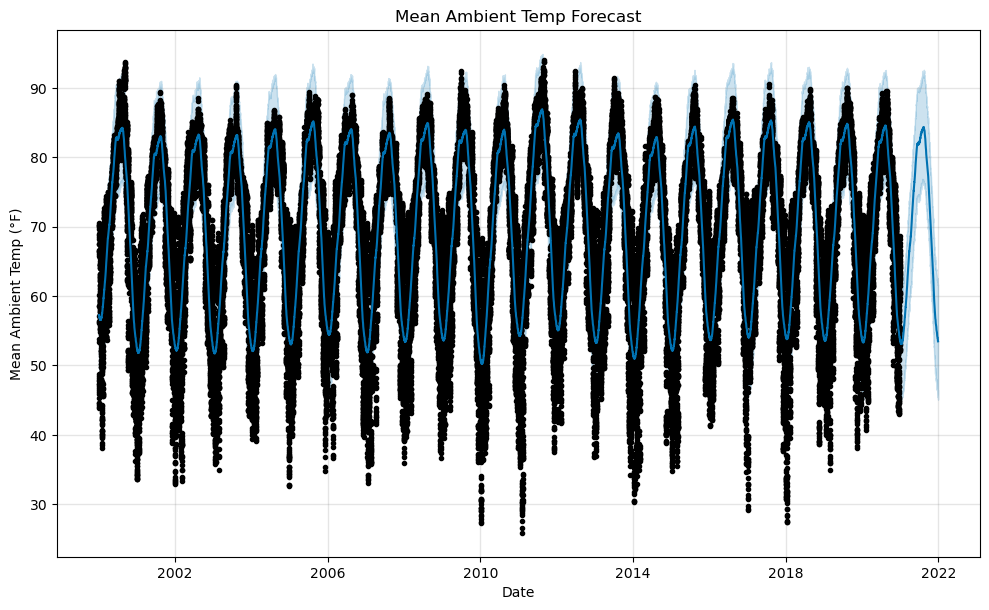

In [58]:
# Define the training_data variable
training_data = harris_co_df.reset_index().rename(columns={'Date': 'ds', 'Mean Ambient Temp': 'y'})

# Create a Prophet model
prophet = Prophet()

# Fit the model to the training data
prophet.fit(training_data)

# Rest of the code...
# Define the forecast horizon
forecast_horizon = 365

# Make a future dataframe for the forecast horizon
future = prophet.make_future_dataframe(periods=forecast_horizon)

# Make predictions
forecast = prophet.predict(future)

# Plot the forecast
plt.figure(figsize=(14, 8))
prophet.plot(forecast, xlabel='Date', ylabel='Mean Ambient Temp (°F)')
plt.title('Mean Ambient Temp Forecast')
plt.grid(True)
plt.show()
